In [1]:
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

import word_wakati as wkt

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,年度,学科／研究科,研究室,学籍番号,賞,氏名,要旨,題目
0,H17,情報科学科,相研,02JK001,NaN,青木雄司,NaN,WEBページにおけるユーザビリティの追及
1,H17,情報科学科,松永研,02JK002,NaN,青柳茂樹,NaN,安全運転管理教育システム(ASSIST)における複数カメラ使用での交通事故防止対策
2,H17,情報科学科,宮崎研,02JK003,NaN,芦刈綾子,NaN,電子透かしの体制に関する検討 -加重平均フィルタ・メディアンフィルタの場合-
3,H17,情報科学科,成研,02JK005,NaN,足達祐治,NaN,対面教育を支援するためのウェブ助言システム
4,H17,情報科学科,石田健研,02JK006,NaN,安部弘治,NaN,衛星通信検討のための気象データの解析-2002年のデータ解析-


In [3]:
df["研究室"].unique()

array(['相研', '松永研', '宮崎研', '成研', '石田健研', '中野研', '仲研', '澤田研', '稲永研', '合志研',
       '米元研', '朝廣研', '牛島研', '下川研', '安部研', 'アプドゥハン研', '花野井研', '廣田研', '有田研',
       '坂本研', '松本研', '斉藤研', '一ノ瀬研', '古井研', '田中・安武研', '松永・合志研', '安武研',
       '田中研', '石田俊研', '前田研', '于研'], dtype=object)

In [4]:
df["年度"].unique()

array(['H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'H25',
       'H26', 'H27', 'H28', 'H29', 'H30', 'R01', 'R02', 'R03', 'R04'],
      dtype=object)

In [5]:
years= df["年度"].unique().tolist()
n_years = len(years) # 18年間
print(n_years)

18


In [6]:
def word_cloud(lab, y, z):
    print(lab, y, z)

In [7]:
# 初年度（H17）～昨年度まで存在する研究室に限定
labs = ['成研', '石田健研', '仲研', '澤田研', '稲永研', '合志研',
       '米元研', '朝廣研', '下川研', '安部研', 'アプドゥハン研']

delta = 6 #1 3 6 9,18
for lab in labs:
    for y in range(0, n_years, delta):
        z = y + delta
        z = z - 1 if z - 1 < n_years else n_years-1     
#         print(f'[{years[y]},{years[z]}]')
        word_cloud(lab, years[y],years[z])
        

成研 H17 H22
成研 H23 H28
成研 H29 R04
石田健研 H17 H22
石田健研 H23 H28
石田健研 H29 R04
仲研 H17 H22
仲研 H23 H28
仲研 H29 R04
澤田研 H17 H22
澤田研 H23 H28
澤田研 H29 R04
稲永研 H17 H22
稲永研 H23 H28
稲永研 H29 R04
合志研 H17 H22
合志研 H23 H28
合志研 H29 R04
米元研 H17 H22
米元研 H23 H28
米元研 H29 R04
朝廣研 H17 H22
朝廣研 H23 H28
朝廣研 H29 R04
下川研 H17 H22
下川研 H23 H28
下川研 H29 R04
安部研 H17 H22
安部研 H23 H28
安部研 H29 R04
アプドゥハン研 H17 H22
アプドゥハン研 H23 H28
アプドゥハン研 H29 R04


In [8]:
df.columns

Index(['年度', '学科／研究科', '研究室', '学籍番号', '賞', '氏名', '要旨', '題目'], dtype='object')

In [45]:
%%time
pos = ['動詞', '名詞', '形容詞']
stops = ['－', '～', '-', '(', ')', '---', '.']

df1 = df[(df['研究室']=='仲研') & (df['年度']<'H20')]
titles =  df1.loc[:,['題目']].values
# print(titles)
texts =[]
for t in titles:
    texts += [wkt.word_seq(t[0])]
# print(texts)
df2 = pd.DataFrame({'text':texts})
df2.head()

Wall time: 556 ms


,text
0,"[生化学, 反応, シミュレータ, 比較, 評価]"
1,"[Mathematica, 生態, 系, シミュレーション]"
2,"[ウェブマセマティカ, 生化学, シミュレーションウェブサイト, 試作]"
3,"[数値, 計算, 数式, 処理, ソフト, 調査, 生化学, 反応, シミュレーション, 評価]"
4,"[仲, 研究, 室, ウェブサイト, 試作]"


In [46]:
%matplotlib inline
# target_col as a list type or a string separated by a space.
npt = nlplot.NLPlot(df2, target_col='text')

# Stopword calculations can be performed.
stopwords = npt.get_stopword(top_n=0, min_freq=0)

fig_unigram = npt.bar_ngram(
    title='Unigram',
    xaxis_label='出現回数',
    yaxis_label='単語',
    ngram=1,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=False,
    save=False,
)
fig_unigram.show()

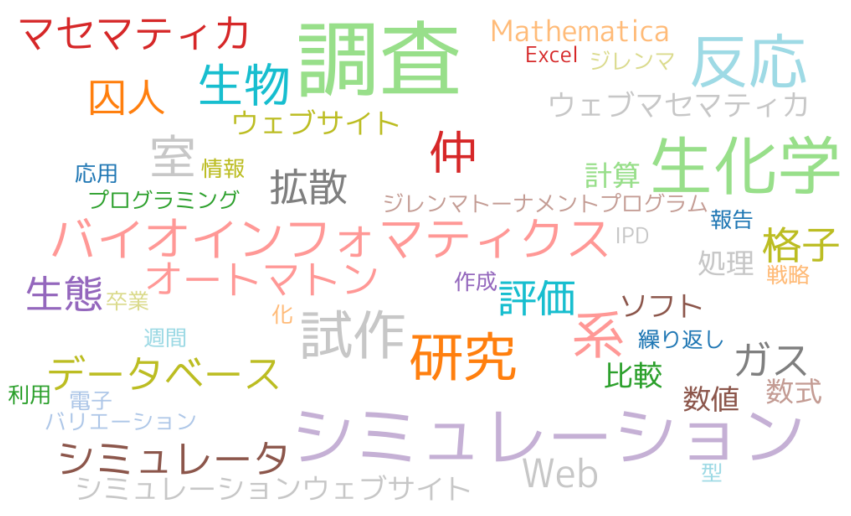

In [44]:
fig_wc = npt.wordcloud(
    width=1000,
    height=600,
    max_words=50,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
    mask_file=None,
    save=False
)
plt.figure(figsize=(15, 25))
plt.imshow(fig_wc, interpolation="bilinear")
plt.axis("off")
plt.show()